# EDA of Covid-19 vaccines

**Source:https://www.kaggle.com/gpreda/covid-world-vaccination-progress**

**Content:**


Country : This is the country for which the vaccination information is provided.

Country ISO Code - ISO code for the country.

Date - date for the data entry.

Total number of vaccinations - this is the absolute number of total immunizations in the country.

Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;

Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;

Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;

Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;

Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;

Number of vaccinations per day - number of daily vaccination for that day and country;

Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;

Vaccines used in the country - total number of vaccines used in the country (up to date);

Source name - source of the information (national authority, international organization, local organization etc.);

Source website - website of the source of information;


**Objectives:**

1. Which country is using what vaccine?
2. In which country the vaccination programme is more advanced?
3. Where are vaccinated more people per day? But in terms of percent from entire population ?

**EDA Procedure:**
1. Importing necessary libraries
2. Importing data set
3. Data preprocessing (removing the variables with large number of null values and renaming variables)
4. Analysis
5. Conclusion

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly as py
import plotly.offline as iplot
from countryinfo import CountryInfo
import plotly.tools as tls
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#importing data set and assigning variable name cv
cv = pd.read_csv("country_vaccinations.csv")
cv

country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
13122     Zimbabwe      ZWE  2021-04-17            311901.0   
13123     Zimbabwe      ZWE  2021-04-18            314446.0   
13124     Zimbabwe      ZWE  2021-04-19            316991.0   
13125     Zimbabwe      ZWE  2021-04-20            325007.0   
13126     Zimbabwe      ZWE  2021-04-21            332996.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
13122           276095.0                  35806.0                  7200.0   
13123           278583.0                  35863.0                  2545.0   
13124           280568.0                  36423.0                  2545.0   
13125           288229.0                  36778.0                  8016.0   
13126           295631.0                  37365.0                  7989.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
13122             12738.0                            2.10   
13123             12993.0                            2.12   
13124             11773.0                            2.13   
13125             10950.0                            2.19   
13126             10124.0                            2.24   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
13122                           1.86                                 0.24   
13123                           1.87                                 0.24   
13124                           1.89                                 0.25   
13125                           1.94                                 0.25   
13126                           1.99                                 0.25   

       daily_vaccinations_per_million            vaccines  \
0                                 NaN  Oxford/AstraZeneca   
1                                35.0  Oxford/AstraZeneca   
2                                35.0  Oxford/AstraZeneca   
3                                35.0  Oxford/AstraZeneca   
4                                35.0  Oxford/AstraZeneca   
...                               ...                 ...   
13122                           857.0   Sinopharm/Beijing   
13123                           874.0   Sinopharm/Beijing   
13124                           792.0   Sinopharm/Beijing   
13125                           737.0   Sinopharm/Beijing   


In [4]:
# top 10 rows
cv.head(10)

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   
5  Afghanistan      AFG  2021-02-27                 NaN                NaN   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 NaN                NaN   
8  Afghanistan      AFG  2021-03-02                 NaN                NaN   
9  Afghanistan      AFG  2021-03-03                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   
5                      NaN                     NaN              1367.0   
6                      NaN                     NaN              1367.0   
7                      NaN                     NaN              1580.0   
8                      NaN                     NaN              1794.0   
9                      NaN                     NaN              2008.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   
5                             NaN                            NaN   
6                            0.02                           0.02   
7                             NaN                            NaN   
8                             NaN                            NaN   
9                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   
5                                  NaN                            35.0   
6                                  NaN                            35.0   
7                                  NaN                            41.0   
8                                  NaN                            46.0   
9                                  NaN                            52.0   

             vaccines                source_name  \
0  Oxford/AstraZeneca  Government of Afghanistan   
1  Oxford/AstraZeneca  Government of Afghanistan   
2  Oxford/AstraZeneca  Government of Afghanistan   
3  Oxford/AstraZeneca  Government of Afghanistan   
4  Oxford/AstraZeneca  Government of Afghanistan   
5  Oxford/AstraZeneca  Government of Afghanistan   
6  Oxford/AstraZeneca  Government of Afghanistan   
7  Oxford/AstraZeneca  Government of Afghanistan   
8  Oxford/AstraZeneca  Government of Afghanistan   
9  Oxford/AstraZeneca  Government of Afghanistan   

                                      source_website  
0  http://www.xinhuanet.com/english/asiapacific/2...  
1  http://www.xinhuanet.com/english/asiapacific/2...  
2  http://www.xinhuanet.com/eng

In [5]:
#lower tail rows
cv.tail()

country iso_code        date  total_vaccinations  people_vaccinated  \
13122  Zimbabwe      ZWE  2021-04-17            311901.0           276095.0   
13123  Zimbabwe      ZWE  2021-04-18            314446.0           278583.0   
13124  Zimbabwe      ZWE  2021-04-19            316991.0           280568.0   
13125  Zimbabwe      ZWE  2021-04-20            325007.0           288229.0   
13126  Zimbabwe      ZWE  2021-04-21            332996.0           295631.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
13122                  35806.0                  7200.0             12738.0   
13123                  35863.0                  2545.0             12993.0   
13124                  36423.0                  2545.0             11773.0   
13125                  36778.0                  8016.0             10950.0   
13126                  37365.0                  7989.0             10124.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
13122                            2.10                           1.86   
13123                            2.12                           1.87   
13124                            2.13                           1.89   
13125                            2.19                           1.94   
13126                            2.24                           1.99   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
13122                                 0.24                           857.0   
13123                                 0.24                           874.0   
13124                                 0.25                           792.0   
13125                                 0.25                           737.0   
13126                                 0.25                           681.0   

                vaccines         source_name  \
13122  Sinopharm/Beijing  Ministry of Health   
13123  Sinopharm/Beijing  Ministry of Health   
13124  Sinopharm/Beijing  Ministry of Health   
13125  Sinopharm/Beijing  Ministry of Health   
13126  Sinopharm/Beijing  Ministry of Health   

                                          source_website  
13122  https://twitter.com/MoHCCZim/status/1384948707...  
13123  https://twitter.com/MoHCCZim/status/1384948707...  
13124  https://twitter.com/MoHCCZim/status/1384948707...  
13125  https://twitter.com/MoHCCZim/status/1384948707...  
13126  https://twitter.com/MoHCCZim/status/1384948707...

# Analysis

In [6]:
cv.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        7.796000e+03       7.132000e+03             5.161000e+03   
mean         4.264439e+06       2.872504e+06             1.363965e+06   
std          1.706338e+07       1.049500e+07             5.821235e+06   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          5.338975e+04       4.733725e+04             2.166300e+04   
50%          3.690585e+05       2.986665e+05             1.549070e+05   
75%          1.716405e+06       1.268145e+06             6.234240e+05   
max          2.159519e+08       1.344456e+08             8.759265e+07   

       daily_vaccinations_raw  daily_vaccinations  \
count            6.528000e+03        1.289200e+04   
mean             1.255260e+05        7.349860e+04   
std              4.650272e+05        3.227763e+05   
min              0.000000e+00        0.000000e+00   
25%              2.864500e+03        8.950000e+02   
50%              1.522250e+04        5.811500e+03   
75%              5.986725e+04        2.753150e+04   
max              7.185000e+06        5.190143e+06   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                     7796.000000                    7132.000000   
mean                        13.810776                      10.210271   
std                         21.739393                      14.476132   
min                          0.000000                       0.000000   
25%                          1.120000                       1.030000   
50%                          5.410000                       4.265000   
75%                         17.190000                      12.730000   
max                        198.010000                     106.560000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                          5161.000000                    12892.000000  
mean                              5.028560                     2908.923518  
std                               9.486776                     4836.307511  
min                               0.000000                        0.000000  
25%                               0.560000                      339.000000  
50%                               2.030000                     1431.000000  
75%                               5.340000                     3680.000000  
max                              91.450000                   118759.000000

In [7]:
#null values
cv.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5331
people_vaccinated                      5995
people_fully_vaccinated                7966
daily_vaccinations_raw                 6599
daily_vaccinations                      235
total_vaccinations_per_hundred         5331
people_vaccinated_per_hundred          5995
people_fully_vaccinated_per_hundred    7966
daily_vaccinations_per_million          235
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [8]:
del cv['people_vaccinated'] # number of null values are large
del cv['people_fully_vaccinated']# number of null values are large
del cv['daily_vaccinations_raw']# number of null values are large
del cv['people_vaccinated_per_hundred']# number of null values are large
del cv['people_fully_vaccinated_per_hundred']# number of null values are large
del cv['source_website'] # unnecessary variable 
del cv["iso_code"] # unneccessary variable
del cv['total_vaccinations']# number of null values are large
del cv['total_vaccinations_per_hundred']# number of null values are large

<AxesSubplot:>

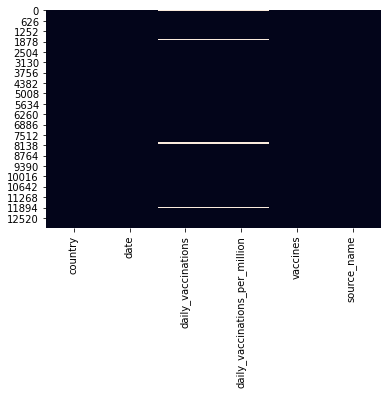

In [9]:
# Representing null values using heatmap
sb.heatmap(cv.isnull(),cbar = False)

In [10]:
## Renaming column names
cv = cv.rename(columns = {"daily_vaccinations":"daily_vacc","daily_vaccinations_per_million":"daily_vacc_per_mill"})
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13127 entries, 0 to 13126
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13127 non-null  object 
 1   date                 13127 non-null  object 
 2   daily_vacc           12892 non-null  float64
 3   daily_vacc_per_mill  12892 non-null  float64
 4   vaccines             13127 non-null  object 
 5   source_name          13127 non-null  object 
dtypes: float64(2), object(4)
memory usage: 615.5+ KB


In [11]:
#countries using vaccination till 5th Febraury 2021 and the vaccines they are using
cv[['country','vaccines']].value_counts().reset_index()

country                                      vaccines    0
0           Canada  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  129
1           Russia                       EpiVacCorona, Sputnik V  128
2            China   Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac  128
3           Israel                      Moderna, Pfizer/BioNTech  124
4    United States     Johnson&Johnson, Moderna, Pfizer/BioNTech  123
..             ...                                           ...  ...
185          Timor                            Oxford/AstraZeneca    1
186          Aruba                               Pfizer/BioNTech    1
187          Congo                  Sinopharm/Beijing, Sputnik V    1
188        Armenia                                     Sputnik V    1
189       Ethiopia                            Oxford/AstraZeneca    1

[190 rows x 3 columns]

In [12]:
#number of vaccines
cv["vaccines"].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2790
Oxford/AstraZeneca                                                                    2305
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1543
Pfizer/BioNTech                                                                       1324
Moderna, Pfizer/BioNTech                                                               531
Pfizer/BioNTech, Sinovac                                                               498
Sputnik V                                                                              442
Oxford/AstraZeneca, Sinovac                                                            360
Oxford/AstraZeneca, Sinopharm/Beijing                                                  329
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           302
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      292

In [36]:
#renaming vaccine names
vaccine = {"vaccines":{"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech": "Moderna,AstraZeneca,Pfizer", 
                       "Pfizer/BioNTech": "Pfizer","Oxford/AstraZeneca, Pfizer/BioNTech": "AstraZeneca,Pfizer",
                       "Oxford/AstraZeneca":"AstraZeneca","Moderna, Pfizer/BioNTech":"Moderna,Pfizer",
                       "Pfizer/BioNTech, Sinovac":"Pfizer,Sinovac","Oxford/AstraZeneca, Sinovac":"Pfizer,AstraZeneca",
                       "Oxford/AstraZeneca, Sinopharm/Beijing":"AstraZeneca,Sinopharm",
                       "Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac":"AstraZeneca,Pfizer,Sinovac",
                       "Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V":"AstraZeneca,Pfizer,Sinopharm,Sputnik V",
                       "Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V":"Moderna,AstraZeneca,Pfizer,Sinopharm,Sputnik V",
                       "Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech":"Johnson&Johnson,Moderna,AstraZeneca,Pfizer",
                       "Moderna, Oxford/AstraZeneca":"Moderna,AstraZeneca","Sinopharm/Beijing, Sputnik V":"Sinopharm,Sputnik V",
                       "Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing":"AstraZeneca,Pfizer,Sinopharm",
                       "Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac":"AstraZeneca,Sinopharm,Sinovac",
                       "Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V":"AstraZeneca,Pfizer,Sinovac,Sputnik V",
                       "Pfizer/BioNTech, Sputnik V":"Pfizer,Sputnik V",
                       "Pfizer/BioNTech, Sinovac, Sputnik V":"Pfizer,Sinovac,Sputnik V",
                       "CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V":"CanSino,AstraZeneca,Pfizer,Sinovac,Sputnik V",
                       "Johnson&Johnson, Moderna, Pfizer/BioNTech":"Johnson&Johnson,Moderna,Pfizer",
                       "Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech":"Johnson&Johnson,Moderna,AstraZeneca,Pfizer",
                      "Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V":"AstraZeneca,Pfizer,Sinopharm,Sinopharm,Sputnik V",
                       "Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V":"AstraZeneca,Sinopharm,Sputnik V",
                      "CanSino, Sinopharm/Beijing, Sputnik V":"CanSino,Sinopharm,Sputnik V","Sinopharm/Beijing, Sputnik V":"Sinopharm,Sputnik V"}}
cv= cv.replace(vaccine)
                

In [38]:
#bar graph for country with respect to vaccines
country_vac=pd.crosstab(cv['country'],cv['vaccines'])
country_vac.iplot(kind="bar",barmode="stack")
print('Canada, China, Russia ,Isreal and United States are usnig the vaccines from 129,128,128,124 and 123 days till 21st April 2021')
print('India using Covaxin and AstraZeneca from 97 days till 21st April 2021')

Canada, China, Russia ,Isreal and United States are usnig the vaccines from 129,128,128,124 and 123 days till 21st April 2021
India using Covaxin and AstraZeneca from 97 days till 21st April 2021


In [15]:
# Bar plot for different health organisations
cv.source_name.value_counts().sort_values(ascending=False).iplot(kind="bar")
print('Highest number of Vaccines supplied by ministry of health')

Highest number of Vaccines supplied by ministry of health


In [16]:
# creating new data frame that includes the data of only Ministry of Health
df = cv[cv.source_name.str.startswith("Ministry of Health")]
df

country        date  daily_vacc  daily_vacc_per_mill  \
45      Albania  2021-01-10         NaN                  NaN   
46      Albania  2021-01-11        64.0                 22.0   
47      Albania  2021-01-12        64.0                 22.0   
48      Albania  2021-01-13        63.0                 22.0   
49      Albania  2021-01-14        66.0                 23.0   
...         ...         ...         ...                  ...   
13122  Zimbabwe  2021-04-17     12738.0                857.0   
13123  Zimbabwe  2021-04-18     12993.0                874.0   
13124  Zimbabwe  2021-04-19     11773.0                792.0   
13125  Zimbabwe  2021-04-20     10950.0                737.0   
13126  Zimbabwe  2021-04-21     10124.0                681.0   

                vaccines         source_name  
45        Pfizer,Sinovac  Ministry of Health  
46        Pfizer,Sinovac  Ministry of Health  
47        Pfizer,Sinovac  Ministry of Health  
48        Pfizer,Sinovac  Ministry of Health  
49        Pfizer,Sinovac  Ministry of Health  
...                  ...                 ...  
13122  Sinopharm/Beijing  Ministry of Health  
13123  Sinopharm/Beijing  Ministry of Health  
13124  Sinopharm/Beijing  Ministry of Health  
13125  Sinopharm/Beijing  Ministry of Health  
13126  Sinopharm/Beijing  Ministry of Health  

[4597 rows x 6 columns]

In [17]:
# countries that are using vaccines provided by the ministry of health
df[['country','vaccines']].value_counts().reset_index()

country                                    vaccines    0
0      Bahrain      AstraZeneca,Pfizer,Sinopharm,Sputnik V  120
1    Lithuania                  Moderna,AstraZeneca,Pfizer  116
2      Czechia                  Moderna,AstraZeneca,Pfizer  116
3      Austria                  Moderna,AstraZeneca,Pfizer  116
4       Poland  Johnson&Johnson,Moderna,AstraZeneca,Pfizer  115
..         ...                                         ...  ...
69        Mali                                 AstraZeneca   14
70  Mauritania                           Sinopharm/Beijing   14
71      Brunei                                 AstraZeneca    5
72    Ethiopia                                 AstraZeneca    1
73     Armenia                                   Sputnik V    1

[74 rows x 3 columns]

In [18]:
# Bar plot for countries using vaccinations provided by the Ministry of Health
country_vac=pd.crosstab(df['country'],df['vaccines'])
country_vac.iplot(kind="bar",barmode="stack")

For 74 countries Ministry of Health is providing vaccines including India and compare to other vaccines "AstraZeneca" is in high demand.

In [19]:
ministry_health = ['Ministry of Health']

In [20]:
# Selecting the rows which includes only "Ministry of Health" in source_name column
min_health = cv.loc[cv['source_name'].isin(ministry_health)]

In [21]:
# drop the rows which includes only "Ministry of Health" in source_name column
other_org = cv.loc[~cv["source_name"].isin(ministry_health)]

In [22]:
print("Share of Ministry of Health in %: ") 
print(len(min_health)/len(cv)*100)
print("-------------------------------------")
print("Share of other Organiation in % : ") 
print(len(other_org)/len(cv)*100)

Share of Ministry of Health in %: 
33.00830349661004
-------------------------------------
Share of other Organiation in % : 
66.99169650338996


In [23]:
# Bar plot for date of vaccination with respect to vaccines 
date_vac=pd.crosstab(cv['date'],cv['vaccines'])
date_vac.iplot(kind="bar",barmode="stack")
print("The process of vaccination is increasing day by day and AstraZeneca vaccines are used more compare to other vaccines.")

The process of vaccination is increasing day by day and AstraZeneca vaccines are used more compare to other vaccines.


In [24]:
# Grouping the countries with respect to daily vaccination per million people
x = cv.groupby('country').sum()
x = x.sort_values(['daily_vacc_per_mill'],ascending=False)
x.head(10)

daily_vacc  daily_vacc_per_mill
country                                              
Gibraltar                68754.0            2040726.0
Falkland Islands          4933.0            1416322.0
Israel                10397334.0            1201234.0
Seychelles              116134.0            1180945.0
Cayman Islands           63043.0             959252.0
Bhutan                  739474.0             958349.0
United Arab Emirates   8900144.0             899876.0
Bermuda                  50982.0             818686.0
Saint Helena              4502.0             741567.0
Isle of Man              62117.0             730509.0

In Gibraltar highest number of people daily vaccinated per million

In [25]:
# Grouping the countries with respect to daily vaccination of people
df = cv.groupby('country').sum()
df = df.sort_values(['daily_vacc'],ascending=False)
df.head(10)

daily_vacc  daily_vacc_per_mill
country                                         
United States   207961231.0             621816.0
China           192061786.0             133430.0
India           124587860.0              90276.0
United Kingdom   41693243.0             614168.0
England          34961473.0             621123.0
Brazil           33097192.0             155710.0
Germany          22234636.0             265379.0
Turkey           20734736.0             245853.0
Indonesia        16980953.0              62079.0
France           16884683.0             247769.0

In United States highest number people daily vaccinated

In [26]:
# Population of the United States
country = CountryInfo('United States')
country.population()

319259000

In [27]:
# Percentage of number of people vaccinated per population in United States
(207961231.0/319259000)*100

65.13872153956505

65.13% of the whole population are vaccinated in United States

In [28]:
# Population of the India
country = CountryInfo('India')
country.population()

1263930000

In [29]:
(124587860.0/1263930000)*100

9.857180381824943

 9.85% of the whole population are vaccinated in India

In [30]:
# Daily Vaccination Trend
px.line(cv, x = 'date', y ='daily_vacc', color = 'country',title = 'Daily vaccination Trend')

By graphical representation we can say that in United States highest number people daily vaccinated regularly.

In [31]:
# World map view of different countries for different vaccinations
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['vaccines'],
                    title="Countries using vaccine (different colors for each vaccine)")
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()
print('Different countries colored on the map with respect to vaccines')

Different countries colored on the map with respect to vaccines


In [32]:
# World map view of different countries for "Daily Vaccination per Million"
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['daily_vacc_per_mill'],
                    title="Daily Vaccination per Million")
fig.update_layout({'legend_orientation':'v'})
fig.show()
print('Daily vaccination of different countries per million')

Daily vaccination of different countries per million


In [33]:
# World map view of different countries for "Daily Vaccination"
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['daily_vacc'],
                    title="Daily Vaccination")
fig.update_layout({'legend_orientation':'v'})
fig.show()
print('Daily vaccination for different countires')

Daily vaccination for different countires


### Conclusion:

1. Canada, China, Russia ,Isreal and United States are usnig the vaccines from 129,128,128,124 and 123 days till 21st April 2021. 
2. 33.008% of vaccine is supplied by Ministry of Health and 66.99% of vaccines are suplied by other health organisations.
3. AsthraZeneca vaccine is in more demand compare to other vaccines.
4. Vaccination program is increasing in the world day by day. 
5. Gibraltar country vaccinated more number of people per million and the growth of vaccinating prople per day is highly increasing in United States.
6. United states has already vaccinated nearly 65.13% of the whole population and India vaccinated 9.85% of the whole population. 